In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from scipy import stats
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

In [5]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [7]:
df = pd.read_csv('data/ted_main.csv')

df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [8]:
#reorder for easyy
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [12]:
df.published_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [13]:
df.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

Dates are in unix timestamp convert into human readable format

In [14]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [18]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [17]:
len(df)

2550

***
total __2550__ talks till __2017__
***

### Most Viewed Talks

In [26]:
top_talk = df[['title','main_speaker','views','film_date']]

top_talk.sort_values('views', ascending=False, inplace=True)

top_talk[:10]

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


In [27]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

***
Avg Views :  __1.6 Million__ <br>
Min Views : __50,000__
***


### Comments

In [31]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

***
Avg Comments : __191.56__ <br>
Min Comments : __2__
***

In [53]:
min_view = df.loc[df['comments'] < 3]
min_view[['title','main_speaker','views','film_date']]

# OR

df[df.comments < 3][['title','main_speaker','views','film_date']]

,title,main_speaker,views,film_date
2534,What it feels like to see Earth from space,Benjamin Grant,646174,07-04-2017


In [59]:
df[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


In [63]:
df[['title','main_speaker','views','comments']].sort_values('comments', ascending=False)[:10]

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


***
Richard Dawkins talk titled [Militant atheism](https://www.youtube.com/watch?v=VxGMqKCcN6A) has most amount of comments
***

### Talk by the moth and year

In [97]:
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(df['month'].value_counts()).reset_index()

month_df.columns = ['month','talks']

month_df

,month,talks
0,Feb,601
1,Mar,397
2,Jun,270
3,Jul,253
4,Nov,232
5,Oct,208
6,Apr,173
7,Dec,123
8,May,123
9,Sep,107


***
>__reset_index()__ : Pandas reset_index() is a method to reset index of a Data Frame. *reset_index()* method sets a list of integer ranging from 0 to length of data as index
***

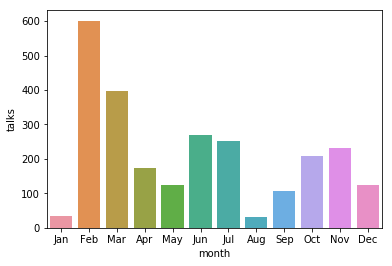

In [84]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

In [100]:
df['year'] = df['film_date'].apply(lambda x : x.split('-')[2])

year_df = pd.DataFrame(df['year'].value_counts().reset_index())

year_df.columns = ['year','talks']

year_df

,year,talks
0,2011,270
1,2013,270
2,2010,267
3,2012,267
4,2016,246
5,2015,239
6,2014,237
7,2009,232
8,2007,114
9,2017,98


In [104]:
year_df[year_df['talks'] == year_df['talks'].max()]

,year,talks
0,2011,270
1,2013,270


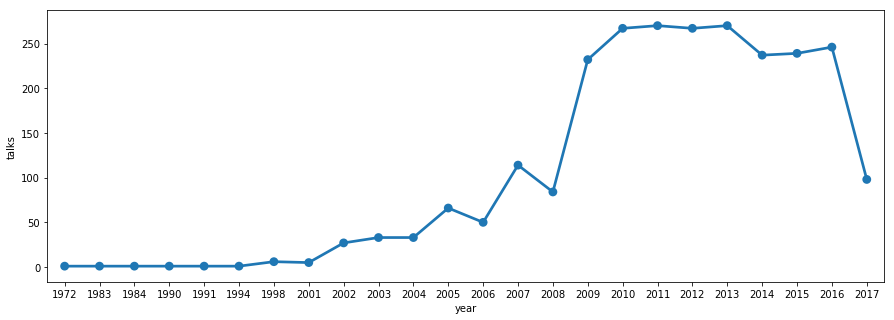

In [105]:
plt.figure(figsize=(15,5))
sns.pointplot(x='year', y='talks', data=year_df)

Sharp incerease in __2009__ <br>
__2011__ and __2013__ has highest talks

### Speakers

In [106]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


### TED Events

In [108]:
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


### Talks In India

In [139]:
ind = df[df['event'].str.contains('India')][['title','main_speaker','views']]

ind.sort_values('views', ascending=False).head()

,title,main_speaker,views
553,The thrilling potential of SixthSense technology,Pranav Mistry,16097077
2020,The nerd's guide to learning everything online,John Green,3361105
606,"Weird, or just different?",Derek Sivers,2835976
567,The fight against sex slavery,Sunitha Krishnan,2543750
574,How to make a splash in social media,Alexis Ohanian,2066733


In [135]:
ind['title'].count()

37

Total __37__ talks were held in __India__

In [160]:
ind_speaker_df = ind.groupby('main_speaker').count().reset_index()[['main_speaker','title']]

ind_speaker_df['main_speaker'].drop_duplicates()

0            Aditi Shankardass
1               Alexis Ohanian
2        Alwar Balasubramaniam
3                 Alyssa Monks
4        Ananda Shankar Jayant
5                   Anil Gupta
6                Anupam Mishra
7                  Asher Hasan
8             Charles Anderson
9                 Derek Sivers
10           Devdutt Pattanaik
11                  Eve Ensler
12                Hans Rosling
13               Harsha Bhogle
14    His Holiness the Karmapa
15                   Jane Chen
16                  John Green
17        Kartick Satyanarayan
18               Kavita Ramdas
19                 Kiran Sethi
20         Lalitesh Katragadda
21            Mallika Sarabhai
22                 Pawan Sinha
23               Pranav Mistry
24              R.A. Mashelkar
25               Ravin Agrawal
26            Romulus Whitaker
27                   Ryan Lobo
28        Sendhil Mullainathan
29               Shaffi Mather
30              Shashi Tharoor
31               Shekhar Kapur
32      

### Ted Themes

In [161]:
#TODO